# Task 1: Dataset
#### Diabetes 130-US Hospitals for Years 1999-2008
This dataset was obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008) website. It is about the records of individuals that were diagnosed with Diabetes Type 2 which was acquired from 130 US hospitals, from 1998 to 2008. 

Our team took interest on this data because one of our team member, Matthew Jackson, suffers fom this disease. However, he has a type 1 Diabetes which is more of a rare case among diabetics. However because of this, his expertise and knowledgde regarding the disease is far more beyond than anyone in the team. He helped clarified some of the terms not any member know or knew what it was e.g. "A1Cresult" which is a measure of blood sugar of an individual.

For this reason, it was then decided that this dataset will be use for the data mining in hopes of finding and learn unseen informations about type 2.

#### Importing pandas and numpy library

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("diabetic_data.csv",header=None,low_memory=False)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO


# Task 2: Business Scenario
The aim for this project is to find, extract, and describe information within the diabetes dataset through the use of three methods of data mining: ARM, Classification, and Clustering. Each method is associated with task specific goals and questions.

###### Association Rule Mining
Goal: Find associations between diabetes medications and other features such as race, gender, age, etc. using apriori and fp growth algorithms. 
- Are there any or different strong assocation patterns between prescribed diabetes medications, number of medical procedures, race, gender, and age?
- Are different levels of number of medications and change in dosage, affected based on race, gender, age, and blood sugar levels?

###### Classification
Goal: Train, test and classify individuals who are at risk of diabetes using the A1Cresult as our feature class using five classification algorithms: Decision Tree, K-NN, Naive Bayes, SVM and One-R.
- Can we determine which binary classification model that best fit in identifying risk of diabetes on such individuals? 
- Can we identify features that best determine what classify as "Risk" and find a well-performing algorithm?

###### Clustering
Goal: Employ three clustering algorithms: K-means, DBSCAN, and Hierarchical clustering. Following each method, analyze and compare the results to gain insights from the datasets.
- Using these clustering methods to explore patterns in medication dosage changes using clustering methods, are there potential groups that stands out?
- Which clustering method is best suitable choice for the diabetes dataset?

#### Open and read CSV File

In [2]:
from pandas.api.types import is_numeric_dtype

for col in df.columns:
    if is_numeric_dtype(df[col]) == False:
        print(df[col].value_counts())

encounter_id    1
190792044       1
190790070       1
190789722       1
190786806       1
               ..
106665324       1
106657776       1
106644876       1
106644474       1
443867222       1
Name: 0, Length: 101767, dtype: int64
88785891     40
43140906     28
88227540     23
23199021     23
1660293      23
             ..
2262456       1
11005362      1
98252496      1
1019673       1
175429310     1
Name: 1, Length: 71519, dtype: int64
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
race                   1
Name: 2, dtype: int64
Female             54708
Male               47055
Unknown/Invalid        3
gender                 1
Name: 3, dtype: int64
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
age             1
Name: 4, dtype: int64
?           

No             101766
citoglipton         1
Name: 40, dtype: int64
No         47383
Steady     30849
Down       12218
Up         11316
insulin        1
Name: 41, dtype: int64
No                     101060
Steady                    692
Up                          8
Down                        6
glyburide-metformin         1
Name: 42, dtype: int64
No                     101753
Steady                     13
glipizide-metformin         1
Name: 43, dtype: int64
No                          101765
glimepiride-pioglitazone         1
Steady                           1
Name: 44, dtype: int64
No                         101764
Steady                          2
metformin-rosiglitazone         1
Name: 45, dtype: int64
No                        101765
metformin-pioglitazone         1
Steady                         1
Name: 46, dtype: int64
No        54755
Ch        47011
change        1
Name: 47, dtype: int64
Yes            78363
No             23403
diabetesMed        1
Name: 48, dtype: int64
NO     

In [3]:
df.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,101767,101767,101767,101767,101767,101767,101767,101767,101767,101767,...,101767,101767,101767,101767,101767,101767,101767,101767,101767,101767
unique,101767,71519,7,4,11,11,9,27,18,15,...,2,5,5,3,3,3,3,3,3,4
top,encounter_id,88785891,Caucasian,Female,[70-80),?,1,1,7,3,...,No,No,No,No,No,No,No,No,Yes,NO
freq,1,40,76099,54708,26068,98569,53990,60234,57494,17756,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


# Task 3: Preprocessing

In [4]:
df.columns = ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamid', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'
]
df.drop(index=df.index[0], axis=0, inplace=True)

data = df.copy()
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print(data.describe())
print(data.head())
print(data.dtypes.value_counts())

The dataset has 101766 rows and 50 columns
       encounter_id patient_nbr       race  gender      age  weight  \
count        101766      101766     101766  101766   101766  101766   
unique       101766       71518          6       3       10      10   
top         2278392    88785891  Caucasian  Female  [70-80)       ?   
freq              1          40      76099   54708    26068   98569   

       admission_type_id discharge_disposition_id admission_source_id  \
count             101766                   101766              101766   
unique                 8                       26                  17   
top                    1                        1                   7   
freq               53990                    60234               57494   

       time_in_hospital  ... citoglipton insulin glyburide-metformin  \
count            101766  ...      101766  101766              101766   
unique               14  ...           1       4                   4   
top                

#### Converting categorical values to numeric 

In [5]:
data['weight'] = pd.to_numeric(data['weight'],errors='coerce') # weight in pounds
data['admission_type_id'] = pd.to_numeric(data['admission_type_id'],errors='coerce') # mixed data types,change all values to numeric
data['discharge_disposition_id'] = pd.to_numeric(data['discharge_disposition_id'],errors='coerce') # mixed data types,change all values to numeric
data['time_in_hospital'] = pd.to_numeric(data['time_in_hospital'],errors='coerce') # number of days between admission and discharge
data['num_lab_procedures'] = pd.to_numeric(data['num_lab_procedures'],errors='coerce') # number of lab test during the encounter
data['num_procedures'] = pd.to_numeric(data['num_procedures'],errors='coerce') # number of procedures other than lab test, during the encounter
data['num_medications'] = pd.to_numeric(data['num_medications'],errors='coerce') # number of distinct generic names administered during the encounter
data['number_outpatient'] = pd.to_numeric(data['number_outpatient'],errors='coerce') # number of outpatient visits in the year preceding the encounter
data['number_emergency'] = pd.to_numeric(data['number_emergency'],errors='coerce') # number of emergency visits in the year preceding the encounter
data['number_inpatient'] = pd.to_numeric(data['number_inpatient'],errors='coerce') # number of inpatient visits in the year preceding the encounter
data['number_diagnoses'] = pd.to_numeric(data['number_diagnoses'],errors='coerce') # number of diagnoses entered to the system

In [6]:
# check data types
numeric_attributes = data.columns[data.dtypes!="object"]
categorical_attributes =data.columns[data.dtypes=="object"]

print(data.dtypes.value_counts())
print(numeric_attributes)
print(categorical_attributes)

object     39
int64      10
float64     1
dtype: int64
Index(['weight', 'admission_type_id', 'discharge_disposition_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1',
       'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamid', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      d

#### Replacing missing values with a user defined constant

In [7]:
# check before replacing missing values "?"
print('Before replacing missing values:')
data.head(20)

Before replacing missing values:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
2,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
5,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
7,55842,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
8,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
9,12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
data_1 = data.copy()
data_1 = data_1.fillna("?")
data_1 = data_1.replace('?', pd.NA)

In [9]:
# replaced numeric values for admission type attribute into readable values, provided by uci website
data_1["admission_type_id"] = data_1["admission_type_id"].replace(1, "Emergency")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(2, "Urgent")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(3, "Elective")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(4, "Newborn")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(5, "Trauma Center")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(6, "Transfer")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(7, "Hospice")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(8, "Unknown")

# replaced numeric values for discharge disposition type attribute into readable values, provided by uci website
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(1, "Home")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(2, "Short Term Hospital")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(3, "SNF")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(4, "ICF")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(5, "Inpatient Care")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(6, "Home w/ Home Health Service")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(7, "Left Against Medical Advice")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(8, "Home Under Care")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(9, "Admitted as an inpatient")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(10, "Nenonate Discharge/Neonatal Aftercare")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(11, "Expired")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(12, "Expected Return for Outpatient Services")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(13, "Hospice/Home")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(14, "Hospice/Medical Facility")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(15, "Medicare-approved Swing Bed")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(16, "Transferred for Outpatient Services")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(17, "Referred for Outpatient Services")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(18, "NULL")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(19, "Expired at Home")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(20, "Expired at Medical facility")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(21, "Expired, Place Unknown")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(22, "Rehabilitation Facility")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(23, "Long Term Care")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(24, "Nursing Facility-Medicaid Certified")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(25, "Not Mapped")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(26, "Unknown/Invalid")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(27, "Federal Health Facility")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(28, "Psychiatric Hospital/Unit")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(29, "Critical Access Hospital")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(30, "Health Care Facility not Defined Elsewhere")

print('After replacing missing values:')
data_1.head(30)

After replacing missing values:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2278392,8222157,Caucasian,Female,[0-10),<NA>,Transfer,Not Mapped,1,1,...,No,No,No,No,No,No,No,No,No,NO
2,149190,55629189,Caucasian,Female,[10-20),<NA>,Emergency,Home,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),<NA>,Emergency,Home,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),<NA>,Emergency,Home,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
5,16680,42519267,Caucasian,Male,[40-50),<NA>,Emergency,Home,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,35754,82637451,Caucasian,Male,[50-60),<NA>,Urgent,Home,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
7,55842,84259809,Caucasian,Male,[60-70),<NA>,Elective,Home,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
8,63768,114882984,Caucasian,Male,[70-80),<NA>,Emergency,Home,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
9,12522,48330783,Caucasian,Female,[80-90),<NA>,Urgent,Home,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,15738,63555939,Caucasian,Female,[90-100),<NA>,Elective,SNF,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


#### Removal of rows containing missing values

In [10]:
# determined that race, diag 1, diag 2, and diag 3 rows have missing values that can be drop
print(f"There are {data_1.isnull().sum().sum()} missing values in this dataset")

print('Number of instances = %d'%(data_1.shape[0]))
print('Number of attributes = %d'%(data_1.shape[1]))

print('Number of missing values:')
for col in data_1.columns:
    print('\t%s:%d'%(col,data_1[col].isna().sum()))

data_1.head(20)

There are 196046 missing values in this dataset
Number of instances = 101766
Number of attributes = 50
Number of missing values:
	encounter_id:0
	patient_nbr:0
	race:2273
	gender:0
	age:0
	weight:101766
	admission_type_id:0
	discharge_disposition_id:0
	admission_source_id:0
	time_in_hospital:0
	payer_code:40256
	medical_specialty:49949
	num_lab_procedures:0
	num_procedures:0
	num_medications:0
	number_outpatient:0
	number_emergency:0
	number_inpatient:0
	diag_1:21
	diag_2:358
	diag_3:1423
	number_diagnoses:0
	max_glu_serum:0
	A1Cresult:0
	metformin:0
	repaglinide:0
	nateglinide:0
	chlorpropamide:0
	glimepiride:0
	acetohexamide:0
	glipizide:0
	glyburide:0
	tolbutamide:0
	pioglitazone:0
	rosiglitazone:0
	acarbose:0
	miglitol:0
	troglitazone:0
	tolazamid:0
	examide:0
	citoglipton:0
	insulin:0
	glyburide-metformin:0
	glipizide-metformin:0
	glimepiride-pioglitazone:0
	metformin-rosiglitazone:0
	metformin-pioglitazone:0
	change:0
	diabetesMed:0
	readmitted:0


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2278392,8222157,Caucasian,Female,[0-10),<NA>,Transfer,Not Mapped,1,1,...,No,No,No,No,No,No,No,No,No,NO
2,149190,55629189,Caucasian,Female,[10-20),<NA>,Emergency,Home,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),<NA>,Emergency,Home,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),<NA>,Emergency,Home,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
5,16680,42519267,Caucasian,Male,[40-50),<NA>,Emergency,Home,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,35754,82637451,Caucasian,Male,[50-60),<NA>,Urgent,Home,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
7,55842,84259809,Caucasian,Male,[60-70),<NA>,Elective,Home,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
8,63768,114882984,Caucasian,Male,[70-80),<NA>,Emergency,Home,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
9,12522,48330783,Caucasian,Female,[80-90),<NA>,Urgent,Home,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,15738,63555939,Caucasian,Female,[90-100),<NA>,Elective,SNF,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [11]:
# only missing values in race and diagnosis features were drop, as dropping other features results in 0 records
# further data cleaning is done in task specific areas 
data_1 = data_1.dropna(subset=["race", "diag_1", "diag_2", "diag_3"])

#### Removal of attributes containing missing values

In [12]:
# weight attribute contained 98053 records with missing values, deemed unusable
data_1.drop('weight', axis=1, inplace=True) 

In [13]:
print(f"There are {data_1.isnull().sum().sum()} missing values in this dataset")

print('Number of instances = %d'%(data_1.shape[0]))
print('Number of attributes = %d'%(data_1.shape[1]))

print('Number of missing values:')
for col in data_1.columns:
    print('\t%s:%d'%(col,data_1[col].isna().sum()))
    
print(data_1.describe())
print(data_1.head())

There are 87242 missing values in this dataset
Number of instances = 98053
Number of attributes = 49
Number of missing values:
	encounter_id:0
	patient_nbr:0
	race:0
	gender:0
	age:0
	admission_type_id:0
	discharge_disposition_id:0
	admission_source_id:0
	time_in_hospital:0
	payer_code:38924
	medical_specialty:48318
	num_lab_procedures:0
	num_procedures:0
	num_medications:0
	number_outpatient:0
	number_emergency:0
	number_inpatient:0
	diag_1:0
	diag_2:0
	diag_3:0
	number_diagnoses:0
	max_glu_serum:0
	A1Cresult:0
	metformin:0
	repaglinide:0
	nateglinide:0
	chlorpropamide:0
	glimepiride:0
	acetohexamide:0
	glipizide:0
	glyburide:0
	tolbutamide:0
	pioglitazone:0
	rosiglitazone:0
	acarbose:0
	miglitol:0
	troglitazone:0
	tolazamid:0
	examide:0
	citoglipton:0
	insulin:0
	glyburide-metformin:0
	glipizide-metformin:0
	glimepiride-pioglitazone:0
	metformin-rosiglitazone:0
	metformin-pioglitazone:0
	change:0
	diabetesMed:0
	readmitted:0
       time_in_hospital  num_lab_procedures  num_procedures

# Task 4: Association Rule Mining (ARM) Method
## Apriori

In [14]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

#### Select required features for apriori analysis

In [15]:
# subset data for apriori and fp-growth method
# purpose is to find item sets between medications and other attributes
apri_data = data_1.copy()
apri_data = apri_data[['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'num_lab_procedures', 'num_medications', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamid', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'
]]

#### Binning and changing values into user defined constants

In [16]:
# both number of medications and lab procedures binned into 3 levels
apri_data['num_medications'] = pd.qcut(apri_data['num_medications'], 3, labels=[0, 1, 2])
apri_data['num_lab_procedures'] = pd.qcut(apri_data['num_lab_procedures'], 3, labels=[0, 1, 2])
apri_data = apri_data.fillna(0)

# numeric values changed into low, med, and high, representing the levels of distribution
apri_data['num_medications'] = apri_data['num_medications'].replace(0, "low_num_med")
apri_data['num_medications'] = apri_data['num_medications'].replace(1, "med_num_med")
apri_data['num_medications'] = apri_data['num_medications'].replace(2, "high_num_med")

apri_data['num_lab_procedures'] = apri_data['num_lab_procedures'].replace(0, "low_num_proc")
apri_data['num_lab_procedures'] = apri_data['num_lab_procedures'].replace(1, "med_num_proc")
apri_data['num_lab_procedures'] = apri_data['num_lab_procedures'].replace(2, "high_num_proc")

# a1cresult values changed into normal, moderate, and high, representing levels of risk
apri_data["A1Cresult"] = apri_data["A1Cresult"].replace(">7", "Moderate Risk")
apri_data["A1Cresult"] = apri_data["A1Cresult"].replace(">8", "High Risk")
apri_data["A1Cresult"] = apri_data["A1Cresult"].replace("Norm", "Normal")

# "None" result is replaced with "Not Measured" as indicated by the UCI website
apri_data["A1Cresult"] = apri_data["A1Cresult"].replace("None", "Not Measured")

apri_data.head(100)

,race,gender,age,admission_type_id,discharge_disposition_id,num_lab_procedures,num_medications,A1Cresult,metformin,repaglinide,...,troglitazone,tolazamid,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
2,Caucasian,Female,[10-20),Emergency,Home,high_num_proc,med_num_med,Not Measured,No,No,...,No,No,No,No,Up,No,No,No,No,No
3,AfricanAmerican,Female,[20-30),Emergency,Home,low_num_proc,med_num_med,Not Measured,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Caucasian,Male,[30-40),Emergency,Home,med_num_proc,med_num_med,Not Measured,No,No,...,No,No,No,No,Up,No,No,No,No,No
5,Caucasian,Male,[40-50),Emergency,Home,med_num_proc,low_num_med,Not Measured,No,No,...,No,No,No,No,Steady,No,No,No,No,No
6,Caucasian,Male,[50-60),Urgent,Home,low_num_proc,med_num_med,Not Measured,No,No,...,No,No,No,No,Steady,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,AfricanAmerican,Female,[70-80),Emergency,Home,low_num_proc,low_num_med,Not Measured,No,No,...,No,No,No,No,Down,No,No,No,No,No
106,Caucasian,Male,[80-90),Emergency,Home w/ Home Health Service,low_num_proc,low_num_med,Not Measured,No,No,...,No,No,No,No,No,No,No,No,No,No
107,Other,Female,[50-60),Emergency,Home,high_num_proc,high_num_med,Not Measured,No,No,...,No,No,No,No,Up,No,No,No,No,No
108,Caucasian,Female,[80-90),Emergency,Home,low_num_proc,low_num_med,Normal,No,No,...,No,No,No,No,No,No,No,No,No,No


#### Listing  and one-hot coding unique values into columns

In [17]:
# listing unique values of all the features
items = set()
for col in apri_data:
    items.update(apri_data[col].unique())
print(items)

{'[80-90)', 'Trauma Center', '[40-50)', 'Elective', '[30-40)', 'Hospice/Home', 'NULL', 'Home w/ Home Health Service', 'Expired at Medical facility', 'Male', 'ICF', 'Down', '[20-30)', 'Moderate Risk', 'Transferred for Outpatient Services', '[10-20)', 'Admitted as an inpatient', 'Hispanic', 'Transfer', 'Short Term Hospital', 'Caucasian', 'Long Term Care', 'Nursing Facility-Medicaid Certified', 'Unknown/Invalid', 'SNF', 'Expired', 'Left Against Medical Advice', 'No', 'low_num_proc', 'Home', 'Expected Return for Outpatient Services', 'Other', 'Female', 'Not Mapped', 'Inpatient Care', 'low_num_med', 'high_num_proc', 'high_num_med', '[50-60)', 'med_num_proc', 'med_num_med', '[90-100)', 'Steady', 'Medicare-approved Swing Bed', 'Referred for Outpatient Services', 'Nenonate Discharge/Neonatal Aftercare', 'Psychiatric Hospital/Unit', 'Up', '[60-70)', 'Federal Health Facility', 'Unknown', 'Hospice/Medical Facility', '[70-80)', 'Home Under Care', 'Not Measured', 'Rehabilitation Facility', 'Hospice

In [18]:
# one-hot coding
itemset = set(items)
encoded_vals = []
for index, row in apri_data.iterrows():
    rowset = set(row)
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_apri_data = pd.DataFrame(encoded_vals)
ohe_apri_data

,[40-50),Elective,Male,ICF,[20-30),Transferred for Outpatient Services,Hispanic,Short Term Hospital,Nursing Facility-Medicaid Certified,Expired,...,[10-20),high_num_proc,Not Measured,Caucasian,med_num_med,No,Home,Up,Emergency,Female
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,1,1,0,1,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,1,1,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98048,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
98049,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,1,1
98050,0,0,1,0,0,0,0,0,0,0,...,0,1,1,1,0,1,1,0,1,0
98051,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,1,0,1


#### ARM: finding frequent item sets - Support = 0.7

In [19]:
# finding item sets using apriori
# support set at 0.7 as this the only parameter value that results in 2 item pair
# anything other than this parameter yields unsatisfying results

freq_items = apriori(ohe_apri_data, min_support=0.7, use_colnames=True, verbose=1)
freq_items.head()

Processing 6 combinations | Sampling itemset size 2


C:\Users\xdcau\OneDrive - James Cook University\CP2403\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.834855,(Not Measured)
1,0.765698,(Caucasian)
2,1.000000,(No)
3,0.834855,"(Not Measured, No)"
4,0.765698,"(No, Caucasian)"


#### Apriori: rule analysis - Confidence = 0.7

In [20]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Not Measured),(No),0.834855,1.000000,0.834855,1.000000,1.0,0.0,inf,0.0
1,(No),(Not Measured),1.000000,0.834855,0.834855,0.834855,1.0,0.0,1.0,0.0
2,(No),(Caucasian),1.000000,0.765698,0.765698,0.765698,1.0,0.0,1.0,0.0
3,(Caucasian),(No),0.765698,1.000000,0.765698,1.000000,1.0,0.0,inf,0.0


### Results and Findings: Apriori 
The results of the appriori function on the data, with a minimum 70% support shows that: there are strong associations between "No"(as in, "No" change in dosage) and "Caucasian" which sits at 76.5% support; And, there are strong associations between "Not Measured" and "No" which sits at 83.4% support.

Based on the rule analysis of the data with a minimum 70% confidence, there were two item sets that are interesting:

- The first row shows that the probability of seeing "No" (antecedent support) changes in dosage appears in 100% of the data records; And, the probability of seeing "Caucasian" (consenquent support) ethnicity appears in 76.5% of the data records. With a confidence value of .765, it shows that of all the records saying "No" changes in dosage, the "Caucasian" ethnicity is present.


- The second row shows that the probability of seeing "Caucasian" (antecedent support) ethnicity appears in 76.5% of the data records; And, the probability of seeing "No" (consenquent support) appears in 100% of the data records. With a confidence value of 1, it shows that of all records saying their race is indentified as "Caucasian", there were "No" changes in dosage.

The other two itemsets (rule 2 and 3) seems to be irrelevant as it did not make sense saying if there were "No" change in dosage then the individuals blood sugar is "Not measured" or vice versa. Unfortunately, all four item sets appears to have a lift value of 1 which means that there are no associations between them.

## FP-Growth

In [21]:
from mlxtend.frequent_patterns import fpgrowth

#### FP: finding frequent item sets - Support = 0.6

In [83]:
# using the ohe data from apriori
# support was set to 60% as it results with the most amount of itemsets
freq_items_2 = fpgrowth(ohe_apri_data, min_support=0.6, use_colnames=True)
freq_items_2

C:\Users\xdcau\OneDrive - James Cook University\CP2403\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,1.000000,(No)
1,0.834855,(Not Measured)
2,0.765698,(Caucasian)
3,0.604520,(Steady)
4,0.834855,"(Not Measured, No)"
5,0.765698,"(No, Caucasian)"
6,0.644376,"(Not Measured, Caucasian)"
7,0.644376,"(Not Measured, No, Caucasian)"
8,0.604520,"(Steady, No)"


#### FP: rule analysis - Confidence = 0.8

In [84]:
# confidence was set to 80% to find really highest confidence
rules = association_rules(freq_items_2, metric="confidence", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Not Measured),(No),0.834855,1.000000,0.834855,1.000000,1.000000,0.000000,inf,0.000000
1,(No),(Not Measured),1.000000,0.834855,0.834855,0.834855,1.000000,0.000000,1.000000,0.000000
2,(Caucasian),(No),0.765698,1.000000,0.765698,1.000000,1.000000,0.000000,inf,0.000000
3,(Caucasian),(Not Measured),0.765698,0.834855,0.644376,0.841554,1.008024,0.005129,1.042279,0.033974
4,"(Not Measured, Caucasian)",(No),0.644376,1.000000,0.644376,1.000000,1.000000,0.000000,inf,0.000000
5,"(No, Caucasian)",(Not Measured),0.765698,0.834855,0.644376,0.841554,1.008024,0.005129,1.042279,0.033974
6,(Caucasian),"(Not Measured, No)",0.765698,0.834855,0.644376,0.841554,1.008024,0.005129,1.042279,0.033974
7,(Steady),(No),0.604520,1.000000,0.604520,1.000000,1.000000,0.000000,inf,0.000000


### Results and Findings: FP Growth
The results of the fp growth function on the data, with a minimum 60% support found 8 strong rules, which 3 of them (item set 0, 1, and 7) may not be useful because it does not seem to be meaningful (similar reasons to rule 2 and 3 apriori analysis).

However, there are three rules that shows higher lift than the others: rule 3, 5, and 6. 

- Rule 3 suggest that, "Caucasian" ethnicity are "Not measured" 1.008 times higher compared to its default state.
- Rule 5 suggest that, "Caucasian" ethnicity and "No" changes in dosage are "Not measured" 1.008 times higher compared to its default state.
- Rule 6 suggest that, "Caucasian" ethnicity are "Not measured" and "No" changes in dosage is 1.008 times higher compared to its default state.

Although FP growth shows higher lift in comparison to apriori results, the lift value is so negligible to the point that it is assumed there are little to no association between the antecedents and consenquent items.

# Task 5: Classification
## Binary Classification
#### Setting up the classification data

In [24]:
class_data = data_1.copy()
class_data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
2,149190,55629189,Caucasian,Female,[10-20),Emergency,Home,7,3,<NA>,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Home,7,2,<NA>,...,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),Emergency,Home,7,2,<NA>,...,No,Up,No,No,No,No,No,Ch,Yes,NO
5,16680,42519267,Caucasian,Male,[40-50),Emergency,Home,7,1,<NA>,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,35754,82637451,Caucasian,Male,[50-60),Urgent,Home,2,3,<NA>,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [25]:
# Convert A1Cresult data into binary data + NAN values (to dropped later).
class_data["A1Cresult"] = class_data["A1Cresult"].replace(">7", "Risk")
class_data["A1Cresult"] = class_data["A1Cresult"].replace(">8","Risk")
class_data["A1Cresult"] = class_data["A1Cresult"].replace("Norm", "Normal")
class_data["A1Cresult"] = class_data["A1Cresult"].replace("None", pd.NA)

###### Choosing 'A1Cresult' as the classification output:
HbA1C results are tests that are done on diabetics to see their average blood glucose levels for the last three months. The test measures the amount of blood sugar attached to your hemoglobin and the result gives a good indication of how well someone is controlling their diabetes. The ideal reading for someone with diabetes is 6.5%, the longer someone's HbA1C results are above normal, the more risk there is of developing life threatening complciations, such as kidney disease, vision problems, nerve damage, and cardiovascular issues. From these tests we hope to develop a profile for someone who currently has outside of normal average blood sugar levels from the data[1].

In [26]:
# Create subset of data.
class_data = class_data[['age', 'race', 'gender', 'A1Cresult', 'diabetesMed']]

In [27]:
# Convert subset to categorical data.
class_data['race'] = pd.Categorical(class_data['race'])
class_data['gender'] = pd.Categorical(class_data['gender'])
class_data['A1Cresult'] = pd.Categorical(class_data['A1Cresult'])
class_data['diabetesMed'] = pd.Categorical(class_data['diabetesMed'])
print(class_data.dtypes)

age              object
race           category
gender         category
A1Cresult      category
diabetesMed    category
dtype: object


In [28]:
# Use pd.get_dummies() to create binary data columns of atrritubes mentioned
data_2 = data_1.copy()
data_2 = pd.get_dummies(data_2[['age', 'race', 'gender', 'diabetesMed']])

# Add dummies binary output to class_data, dataframe and remove now redundant, non binary data columns from dataset.
class_data = pd.concat((data_2, class_data), axis=1)
class_data = class_data.drop(['age', 'race', 'gender', 'diabetesMed'], axis=1)

# Drop NAN data from data-frame to create clean subset.
class_data = class_data.dropna()

###### Pre-processing for Classification
The pre-processing for this data set was turning the A1Cresult column into binary data to use for classification purposes. The A1Cresult column originally contained values such as '>7', '>8', 'Norm' and 'None'. The values here were then replaced to create a binary dataset to simplify the categorisation process with the 'None' values replaced with NAN. The rest of the subset features were then encoded into numerical representations suitable for classification algorithms using pd.get_dummies.      

The encoded values were added to the subset and the redundant columns were removed which were used for encoding were removed. The missing or NAN data was then dropped from the set, resulting in a clean dataset for classification. 

#### Training and Test set creation

In [29]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Set data into output and input dataframes for classification
Y = class_data['A1Cresult']
X = class_data.drop(['A1Cresult'], axis=1)

# Split the input data into training and testing data sets. Training 80%, Testing 20%
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

#### Model Fitting and Evaluation

In [30]:
# Use maxdepth list to iterate over and find where overfitting starts to occur for decision tree model.
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc= np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(x_train, y_train)
    y_predTrain = clf.predict(x_train)
    y_predTest = clf.predict(x_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    index += 1

#### Plot of Training and Test Accuracies

Text(0, 0.5, 'Accuracy')

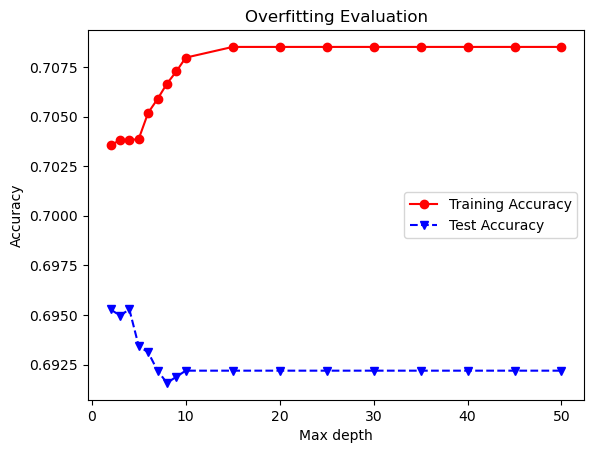

In [31]:
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.title('Overfitting Evaluation')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

#### Explanation of Max Depth and Decision tree.
For this Algorithm we looked at figures of training and test data results compared with decision tree depth to make sure we didn't exceed the max depth of the algorithm which caused over fitting to occur. From the results of the Plotting and Training Test accuracy graph we can see that testing dataset is most accurate at depth levels of 2 and 4 (taken from the maxdepth list). Going forward we decided to go with the depth of 4 as it would provide a more interesting result than if we just used 2 without any major loss in accuracy. 

## Decision Tree

Accuracy of Decision Tree classifier on training set: 0.70
Accuracy of Decision Tree classifier on test set: 0.70


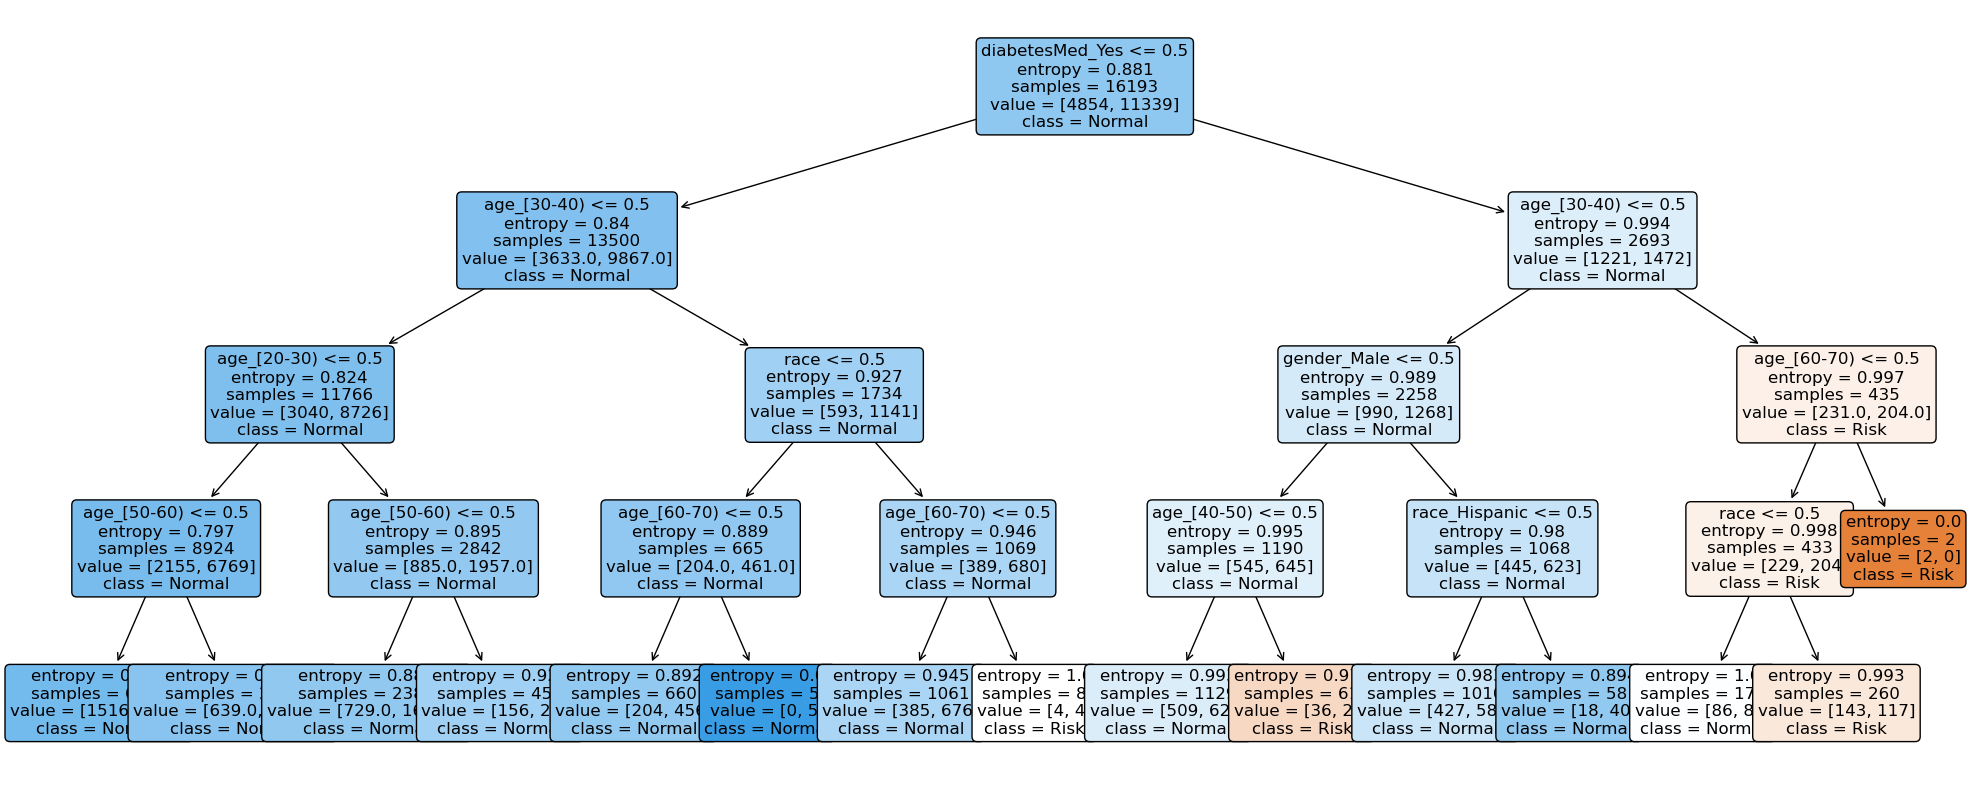

In [32]:
clf_dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf_dt = clf_dt.fit(X, Y)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf_dt.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf_dt.score(x_test, y_test)))

plt.figure(figsize=(25, 10))
tree.plot_tree(clf_dt, feature_names=['race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
                                   'age_[0-10)', 'age_[10-20)', 'age_[20-30)', 'age_[30-40)', 'age_[40-50)',
                                   'age_[50-60)', 'age_[60-70)', 'age_[70-80)', 'age_[80-90)', 'age_[90-100)', 
                                   'race', 'gender_Male', 'gender_Female','diabetesMed_Yes', 'diabetesMed_No', 'A1Cresult'], 
                                   class_names=['Risk', 'Normal'], filled=True, rounded=True, fontsize=12)

plt.show()
test_pred_decision_tree = clf_dt.predict(x_test)

#### Further analysis of DT using the Confusion Matrix and Metrics

C:\Users\xdcau\OneDrive - James Cook University\CP2403\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\xdcau\OneDrive - James Cook University\CP2403\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\xdcau\OneDrive - James Cook University\CP2403\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\xdcau\OneDrive - James Cook University\CP2403\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


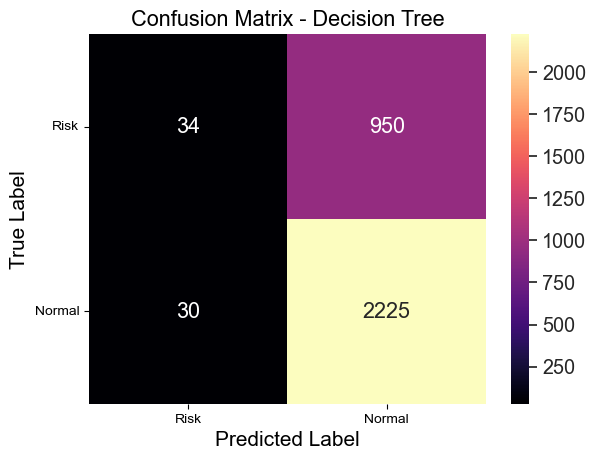

<Figure size 1500x1000 with 0 Axes>

In [33]:
from sklearn import metrics
import seaborn as sns

confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)
matrix_class_data = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(15,10))
sns.heatmap(matrix_class_data, annot=True, fmt='g', ax=ax, cmap="magma")

ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted Label", fontsize = 15)
ax.set_xticklabels(['Risk', 'Normal'])
ax.set_ylabel('True Label', fontsize=15)
ax.set_yticklabels(['Risk', 'Normal'], rotation=0)
plt.show()

In [34]:
print(metrics.classification_report(y_test, test_pred_decision_tree))

              precision    recall  f1-score   support

      Normal       0.53      0.03      0.06       984
        Risk       0.70      0.99      0.82      2255

    accuracy                           0.70      3239
   macro avg       0.62      0.51      0.44      3239
weighted avg       0.65      0.70      0.59      3239



### Results and Findings: Decision Tree
The decision tree model shows that it does well at indentifying instances of diabetes that have risks of diabetes complications. With a high precision (0.70) and recall (0.99). While the emphasis on high recall is desireable to help reduce FN cases in medical classification, the model's low recall (0.03) for the 'Normal' class raises some concerns. The problem here is that although the model might effective at indentifying risk instances, the model may be overly biased towards classifying everything as 'Risk'. Meaning that it will probably need some adjusting if it were to be used in a real life situation.

It should be noted that out of the attributes in the subset, it suggested that 'diabetes_med = no' is the root node of the decision tree which means it has the maximum information gain in the data set for predicting someone's blood sugar control. This is interesting because this data set is about people who have diabetes and suggests that people who are not using or not wanting to use medication to help control the disease are possibly at a higher risk of running into issues from high blood sugars. This information could be valuable to practicioners and other people involved in trying to address diabetes risk factors and improving patient outcomes. 

## K-NN Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(x_test, y_test)))

test_pred_knn = knn.predict(x_test)

Accuracy of K-NN classifier on training set: 0.62
Accuracy of K-NN classifier on test set: 0.61


#### Further analysis of K-NN using the Confusion Matrix and Metrics

C:\Users\xdcau\OneDrive - James Cook University\CP2403\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\xdcau\OneDrive - James Cook University\CP2403\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


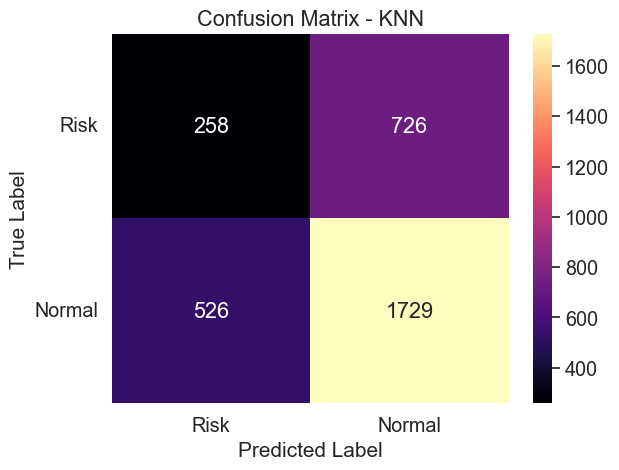

<Figure size 1500x1000 with 0 Axes>

In [36]:
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_knn)
matrix_class_data = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(15,10))
sns.heatmap(matrix_class_data, annot=True, fmt='g', ax=ax, cmap="magma")

ax.set_title('Confusion Matrix - KNN')
ax.set_xlabel("Predicted Label", fontsize = 15)
ax.set_xticklabels(['Risk', 'Normal'])
ax.set_ylabel('True Label', fontsize=15)
ax.set_yticklabels(['Risk', 'Normal'], rotation=0)
plt.show()

In [37]:
print(metrics.classification_report(y_test, test_pred_knn))

              precision    recall  f1-score   support

      Normal       0.33      0.26      0.29       984
        Risk       0.70      0.77      0.73      2255

    accuracy                           0.61      3239
   macro avg       0.52      0.51      0.51      3239
weighted avg       0.59      0.61      0.60      3239



### Results and Findings: K-NN
For KNN results we tried with the default of N=5 neighbours to get initial values. We then back and started from N=2 neighbours all the way up to N=10 in an attempt to find an optimal balance between accuracy and performance. After about N=4 the accuracy seemed to not improve much with an increase in neighbours. We found from testing that we get the best results from the N=3 test. From a result comparison between both N=3 and N=5 we can see that N=3 has higher precision and recall for both classes and overall better accuracy. It is better at being less bias towards the 'risk' category when compared with the Decision Tree algorithm and at this point in time would be a better choice due to it being more open to choosing another category then 'Risk'. 

## Naive Bayes Classification

In [38]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print('Accuracy of GNB on training set: {:.2f}'.format(gnb.score(x_train, y_train)))
print('Accuracy of GNB on test set: {:.2f}'.format(gnb.score(x_test, y_test)))

test_pred_gnb = gnb.predict(x_test)

Accuracy of GNB on training set: 0.65
Accuracy of GNB on test set: 0.65


#### Further analysis of Naive bayes using the Confusion Matrix and Metrics

C:\Users\xdcau\OneDrive - James Cook University\CP2403\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\xdcau\OneDrive - James Cook University\CP2403\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


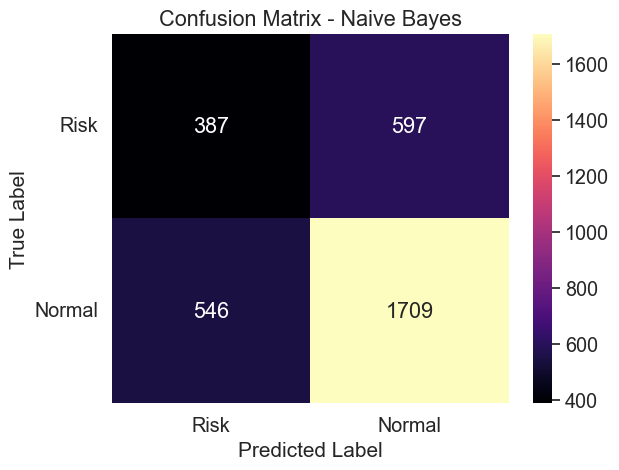

<Figure size 1500x1000 with 0 Axes>

In [39]:
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_gnb)
matrix_class_data = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(15,10))
sns.heatmap(matrix_class_data, annot=True, fmt='g', ax=ax, cmap="magma")

ax.set_title('Confusion Matrix - Naive Bayes')
ax.set_xlabel("Predicted Label", fontsize = 15)
ax.set_xticklabels(['Risk', 'Normal'])
ax.set_ylabel('True Label', fontsize=15)
ax.set_yticklabels(['Risk', 'Normal'], rotation=0)
plt.show()

In [40]:
print(metrics.classification_report(y_test, test_pred_gnb))

              precision    recall  f1-score   support

      Normal       0.41      0.39      0.40       984
        Risk       0.74      0.76      0.75      2255

    accuracy                           0.65      3239
   macro avg       0.58      0.58      0.58      3239
weighted avg       0.64      0.65      0.64      3239



### Results and Findings: Naive Bayes
When compared to the other classification algorithms used so far, Naive Bayes appears to perform better overall at classifying the different categorical outputs of 'A1Cresult'. The recall values for both categories is spread more evenly showing that this algorithm is less biased in making its decision when compared to the others, and still offers a competitive accuracy.

## Support Vector Machine Classification

In [41]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
print('Accuracy of SVM on training set: {:.2f}'.format(svm.score(x_train, y_train)))
print('Accuracy of SVM on test set: {:.2f}'.format(svm.score(x_test, y_test)))

test_pred_svm = svm.predict(x_test)

Accuracy of SVM on training set: 0.71
Accuracy of SVM on test set: 0.70


#### Further analysis of SVM using the Confusion Matrix and Metrics

C:\Users\xdcau\OneDrive - James Cook University\CP2403\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\xdcau\OneDrive - James Cook University\CP2403\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


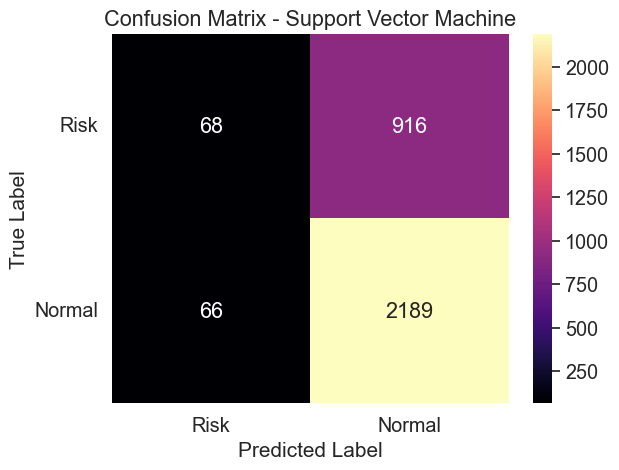

<Figure size 1500x1000 with 0 Axes>

In [42]:
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_svm)
matrix_class_data = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(15,10))
sns.heatmap(matrix_class_data, annot=True, fmt='g', ax=ax, cmap="magma")

ax.set_title('Confusion Matrix - Support Vector Machine')
ax.set_xlabel("Predicted Label", fontsize = 15)
ax.set_xticklabels(['Risk', 'Normal'])
ax.set_ylabel('True Label', fontsize=15)
ax.set_yticklabels(['Risk', 'Normal'], rotation=0)
plt.show()

In [43]:
print(metrics.classification_report(y_test, test_pred_svm))

              precision    recall  f1-score   support

      Normal       0.51      0.07      0.12       984
        Risk       0.70      0.97      0.82      2255

    accuracy                           0.70      3239
   macro avg       0.61      0.52      0.47      3239
weighted avg       0.64      0.70      0.61      3239



### Results and Findings: Support Vector Machine
The SVM results are similar to the decision tree outputs. The recall for Risk is too high (0.97) and the recall for Normal is (0.07) which again is too heavily swayed towards the 'Risk' categorisation output, and suggests it has trouble identifying normal cases and should probably be adjusted to achieve less biased results before being deployed in a real world situation.

## One-R Classification

In [44]:
class OneR(object):
    
    def __init__(self):
        self.ideal_variable = None
        self.max_accuracy = 0
        
    def fit(self, X, y):
        response = list()
        result = dict()
        
        dfx = pd.DataFrame(X)
        
        for i in dfx:
            result[str(i)] = dict()
            options_values = set(dfx[i])
            join_data = pd.DataFrame({"variable":dfx[i], "label":y})
            cross_table = pd.crosstab(join_data.variable, join_data.label)
            summary = cross_table.idxmax(axis=1)
            result[str(i)] = dict(summary)
            
            counts = 0
            
            for idx, row in join_data.iterrows():
                if row['label'] == result[str(i)][row['variable']]:
                    counts += 1
            
            accuracy = (counts/len(y))
            
            
            if accuracy > self.max_accuracy:
                self.max_accuracy = accuracy
                self.ideal_variable = i
                
            result_feature = {"variable": str(i), "accuracy":accuracy, "rules":result[str(i)]}
            response.append(result_feature)
            
        return response
    
    def predict(self, X=None):
        self_ideal_variable = self.ideal_variable + 1
        
    def __repr__(self):
        if self.ideal_variable != None:
            txt = "The best variable for this data is:" + str(self.ideal_variable)
        else:
            txt = "The best variable has not been found yet, try running the fit method first"
            
        return txt

In [45]:
clf_one_r = OneR()
test_results = clf_one_r.fit(x_test, y_test)

print(test_results)
print(clf_one_r)

[{'variable': 'age_[0-10)', 'accuracy': 0.6962025316455697, 'rules': {0: 'Risk', 1: 'Risk'}}, {'variable': 'age_[10-20)', 'accuracy': 0.6962025316455697, 'rules': {0: 'Risk', 1: 'Risk'}}, {'variable': 'age_[20-30)', 'accuracy': 0.6962025316455697, 'rules': {0: 'Risk', 1: 'Risk'}}, {'variable': 'age_[30-40)', 'accuracy': 0.6962025316455697, 'rules': {0: 'Risk', 1: 'Risk'}}, {'variable': 'age_[40-50)', 'accuracy': 0.6962025316455697, 'rules': {0: 'Risk', 1: 'Risk'}}, {'variable': 'age_[50-60)', 'accuracy': 0.6962025316455697, 'rules': {0: 'Risk', 1: 'Risk'}}, {'variable': 'age_[60-70)', 'accuracy': 0.6962025316455697, 'rules': {0: 'Risk', 1: 'Risk'}}, {'variable': 'age_[70-80)', 'accuracy': 0.6962025316455697, 'rules': {0: 'Risk', 1: 'Risk'}}, {'variable': 'age_[80-90)', 'accuracy': 0.6962025316455697, 'rules': {0: 'Risk', 1: 'Risk'}}, {'variable': 'age_[90-100)', 'accuracy': 0.6962025316455697, 'rules': {0: 'Risk', 1: 'Risk'}}, {'variable': 'race_AfricanAmerican', 'accuracy': 0.69620253

### Results and Findings: One-R
This was done our of sheer curiosity to see if it would identify the same node as the decision tree algorithm. It did not in this case as One-R results shows the best variable is age 0-10, but it was interesting to include anyway.

# Task 6: Clustering

## K-Means

#### Setting up the clustering data

In [46]:
#using our team's processed dataset (data_1) for clustering analysis
cluster_data = data_1.copy()

# get the number of instances and attributes in the dataset
instance_count, feature_count = cluster_data.shape
print(f'Number of instances: {instance_count}, Number of attributes: {feature_count}')

Number of instances: 98053, Number of attributes: 49


#### Choosing medication-related columns from the clustering data

In [47]:
print(cluster_data.columns)

medical_data=cluster_data[["metformin","repaglinide","nateglinide","chlorpropamide","glimepiride","acetohexamide","glipizide","glyburide","pioglitazone","rosiglitazone","acarbose","miglitol","troglitazone","examide","citoglipton","insulin","glyburide-metformin","glimepiride-pioglitazone","metformin-rosiglitazone","metformin-pioglitazone","tolbutamide"]]
medical_data

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamid', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')


,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,pioglitazone,rosiglitazone,...,miglitol,troglitazone,examide,citoglipton,insulin,glyburide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,tolbutamide
2,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
3,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
5,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
6,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101762,Steady,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Down,No,No,No,No,No
101763,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
101764,Steady,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Down,No,No,No,No,No
101765,No,No,No,No,No,No,Steady,No,Steady,No,...,No,No,No,No,Up,No,No,No,No,No


#### Converting medication dosage to numerical values: "No" -> 0, "Down" -> 1, "Steady" -> 2, "Up" -> 3

In [48]:
mapping = {"No": 0, "Down": 1, "Steady": 2, "Up": 3}

# Replace medication dosage values in the DataFrame
medical_data.replace(mapping, inplace=True)

# Display the transformed DataFrame
print(medical_data.head(15))

    metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  \
2           0            0            0               0            0   
3           0            0            0               0            0   
4           0            0            0               0            0   
5           0            0            0               0            0   
6           0            0            0               0            0   
7           2            0            0               0            2   
8           0            0            0               0            0   
9           0            0            0               0            0   
10          0            0            0               0            0   
11          0            0            0               0            0   
12          0            0            0               0            0   
13          2            3            0               0            0   
14          0            0            0               0         

C:\Users\xdcau\AppData\Local\Temp\ipykernel_13596\3205169773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medical_data.replace(mapping, inplace=True)


#### Applying K-Means clustering with 2 clusters and 50 maximum iterations

In [49]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(medical_data.values) 

# Obtaining cluster labels
labels = k_means.labels_

# Renaming 'patient_nbr' to 'patient_ID'
cluster_data.rename(columns={'patient_nbr': 'patient_ID'}, inplace=True)

# Creating DataFrame of cluster labels with patient IDs
pd.DataFrame(labels, cluster_data.patient_ID , columns=['Cluster ID'])

,Cluster ID
patient_ID,
55629189,1
86047875,0
82442376,1
42519267,1
82637451,1
...,...
100162476,0
74694222,1
41088789,0


#### Calculating centroids of the clusters and displaying them

In [50]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids, columns=medical_data.columns)

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,pioglitazone,rosiglitazone,...,miglitol,troglitazone,examide,citoglipton,insulin,glyburide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,tolbutamide
0,0.401672,0.032326,0.013896,0.002423,0.097428,-6.488272e-18,0.256135,0.232513,0.144204,0.121517,...,0.000831,0.000069,0.0,0.0,0.204946,0.013117,-6.488272e-18,0.0,-6.488272e-18,0.000519
1,0.391015,0.030794,0.014677,0.000770,0.111133,4.966846e-05,0.247796,0.182258,0.148385,0.134105,...,0.000596,0.000050,0.0,0.0,2.270668,0.014478,4.966846e-05,0.0,4.966846e-05,0.000348


In [51]:
# Generating descriptive statistics for the dataset
medical_data.describe()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,pioglitazone,rosiglitazone,...,miglitol,troglitazone,examide,citoglipton,insulin,glyburide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,tolbutamide
count,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,...,98053.000000,98053.000000,98053.0,98053.0,98053.000000,98053.000000,98053.000000,98053.0,98053.000000,98053.000000
mean,0.397295,0.031697,0.014217,0.001744,0.103057,0.000020,0.252710,0.211875,0.145921,0.126687,...,0.000734,0.000061,0.0,0.0,1.053267,0.013676,0.000020,0.0,0.000020,0.000449
std,0.813788,0.255353,0.169774,0.060484,0.450839,0.006387,0.677535,0.630538,0.525666,0.491725,...,0.038581,0.011063,0.0,0.0,1.099934,0.165284,0.006387,0.0,0.006387,0.029955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,2.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,2.000000,0.0,0.0,3.000000,3.000000,2.000000,0.0,2.000000,2.000000


#### Generating random test data

In [52]:
possible_values = [0, 1, 2, 3]
num_features = 21
num_samples = 5
test_data = []

# Creating random test instances
for _ in range(num_samples):
    test_instance = np.random.choice(possible_values, size=num_features)
    test_data.append(test_instance.tolist())

# Converting test data to NumPy array
test_data = np.array(test_data)

# Predicting cluster labels for test data
labels = k_means.predict(test_data)
labels = labels.reshape(-1,1)

# Assigning patient IDs
patient_ids = np.array(['patient1', 'patient2', 'patient3', 'patient4', 'patient5']).reshape(-1,1)

# Inserting patient ID and cluster ID into columns
cols = medical_data.columns.tolist()
cols.insert(0, "patient_ID")
cols.append('Cluster ID')

# Displaying test data
print(test_data)

[[2 2 1 2 1 2 2 2 0 1 1 2 1 3 2 3 1 0 2 2 3]
 [2 2 1 3 3 0 1 2 2 3 1 1 0 1 1 3 0 1 3 2 3]
 [2 1 1 1 3 1 0 2 3 1 2 3 3 0 0 2 3 2 0 3 2]
 [0 3 1 0 1 2 2 3 0 3 2 3 1 3 0 1 2 3 3 3 3]
 [2 0 0 0 3 0 2 3 1 3 1 1 2 2 1 0 1 1 1 3 1]]


#### Displaying test data's cluster category result

In [53]:
result = pd.DataFrame(np.concatenate((patient_ids, test_data, labels), axis=1), columns=cols)
result

,patient_ID,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,pioglitazone,...,troglitazone,examide,citoglipton,insulin,glyburide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,tolbutamide,Cluster ID
0,patient1,2,2,1,2,1,2,2,2,0,...,1,3,2,3,1,0,2,2,3,1
1,patient2,2,2,1,3,3,0,1,2,2,...,0,1,1,3,0,1,3,2,3,1
2,patient3,2,1,1,1,3,1,0,2,3,...,3,0,0,2,3,2,0,3,2,1
3,patient4,0,3,1,0,1,2,2,3,0,...,1,3,0,1,2,3,3,3,3,0
4,patient5,2,0,0,0,3,0,2,3,1,...,2,2,1,0,1,1,1,3,1,0


##### Calculating SSE to determine the optimal K value

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'SSE')

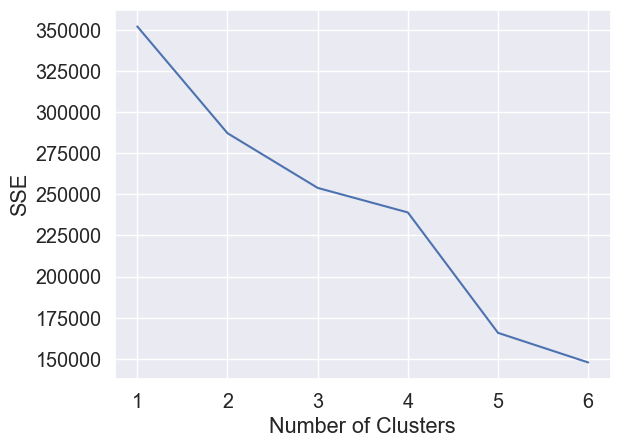

In [55]:
# Calculating SSE for each cluster number using KMeans clustering for medica_data

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(medical_data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

#### Displaying medical data before dimensionality reduction

In [56]:
medical_data

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,pioglitazone,rosiglitazone,...,miglitol,troglitazone,examide,citoglipton,insulin,glyburide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,tolbutamide
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
3,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
5,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,2,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101762,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
101763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
101764,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
101765,0,0,0,0,0,0,2,0,2,0,...,0,0,0,0,3,0,0,0,0,0


#### Dimensionality reduction: applying Principal Component Analysis (PCA) with 2 components

In [57]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [58]:
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(medical_data)

pca = PCA(n_components=2)
pca.fit(scaled_data)

# Extracting principal components and transforming the scaled data
principal_components = pca.components_
medical_PCA_result_data = pca.transform(scaled_data)


print("Principal Components:")
print(principal_components)
print("\n medica PCA2_result_data Data:")
print(medical_PCA_result_data)

Principal Components:
[[ 0.69636948 -0.04048122  0.02657482 -0.0966214   0.02712923  0.01763832
   0.16754997  0.48771871  0.09558511  0.38504845  0.14867258  0.01886961
  -0.0026008   0.          0.         -0.22018625 -0.08822873 -0.01225737
   0.          0.00519601 -0.00951534]
 [ 0.11931163  0.11119448  0.13934416 -0.06910365  0.12886185 -0.02264707
   0.65228032 -0.51107276  0.34404409 -0.06228781  0.20580286  0.15563066
   0.08951722 -0.         -0.          0.01588528 -0.10126961  0.08751853
  -0.          0.16714276 -0.04985915]]

 medica PCA2_result_data Data:
[[-1.08352203 -0.24047956]
 [ 0.01161441  1.6416561 ]
 [-1.08352203 -0.24047956]
 ...
 [ 1.02827932  0.02386322]
 [-0.2252579   2.99397346]
 [-0.48297523 -0.28380585]]


#### Displaying a scatter plot of the medical_PCA_result_data

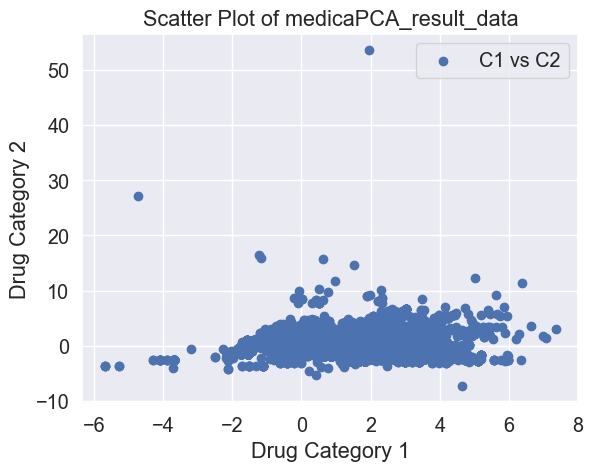

In [59]:
plt.scatter(medical_PCA_result_data[:, 0], medical_PCA_result_data[:, 1], label='C1 vs C2')
plt.xlabel('Drug Category 1')
plt.ylabel('Drug Category 2')
plt.title('Scatter Plot of medicaPCA_result_data')
plt.legend()
plt.show()

#### Calculating SSE for optimal K value after PCA

Text(0, 0.5, 'SSE')

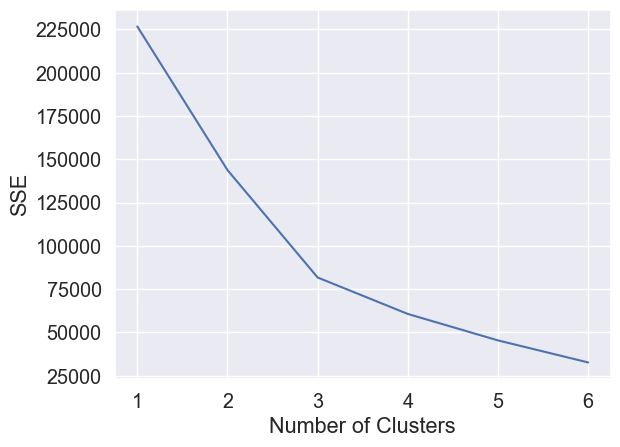

In [60]:
numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(medical_PCA_result_data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

#### Silhouette analysis for KMeans clustering

In [61]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm

In [62]:
silhouette_data=medical_PCA_result_data.copy()
silhouette_data

array([[-1.08352203, -0.24047956],
       [ 0.01161441,  1.6416561 ],
       [-1.08352203, -0.24047956],
       ...,
       [ 1.02827932,  0.02386322],
       [-0.2252579 ,  2.99397346],
       [-0.48297523, -0.28380585]])

For n_clusters = 2 The average silhouette_score is : 0.513341522556362
For n_clusters = 3 The average silhouette_score is : 0.6424104362789629
For n_clusters = 4 The average silhouette_score is : 0.6689530540227212
For n_clusters = 5 The average silhouette_score is : 0.695849214681595
For n_clusters = 6 The average silhouette_score is : 0.6976295095768457


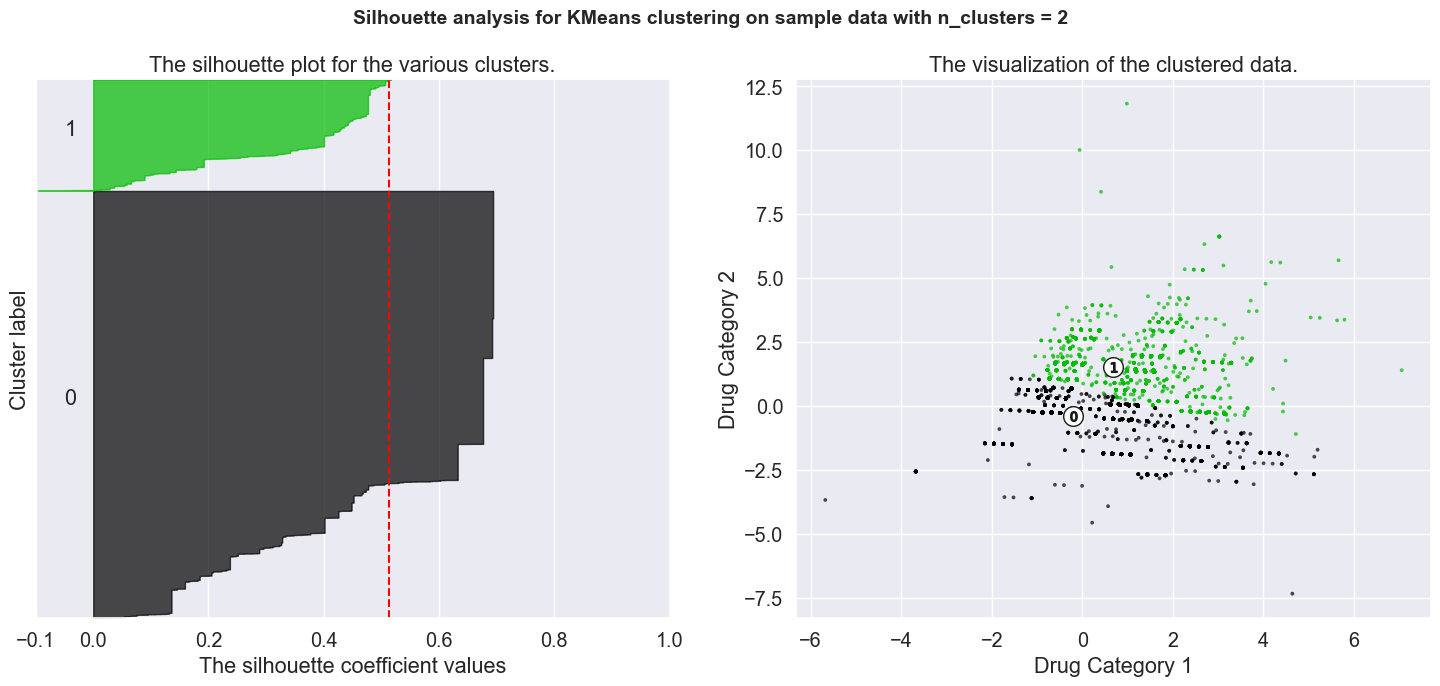

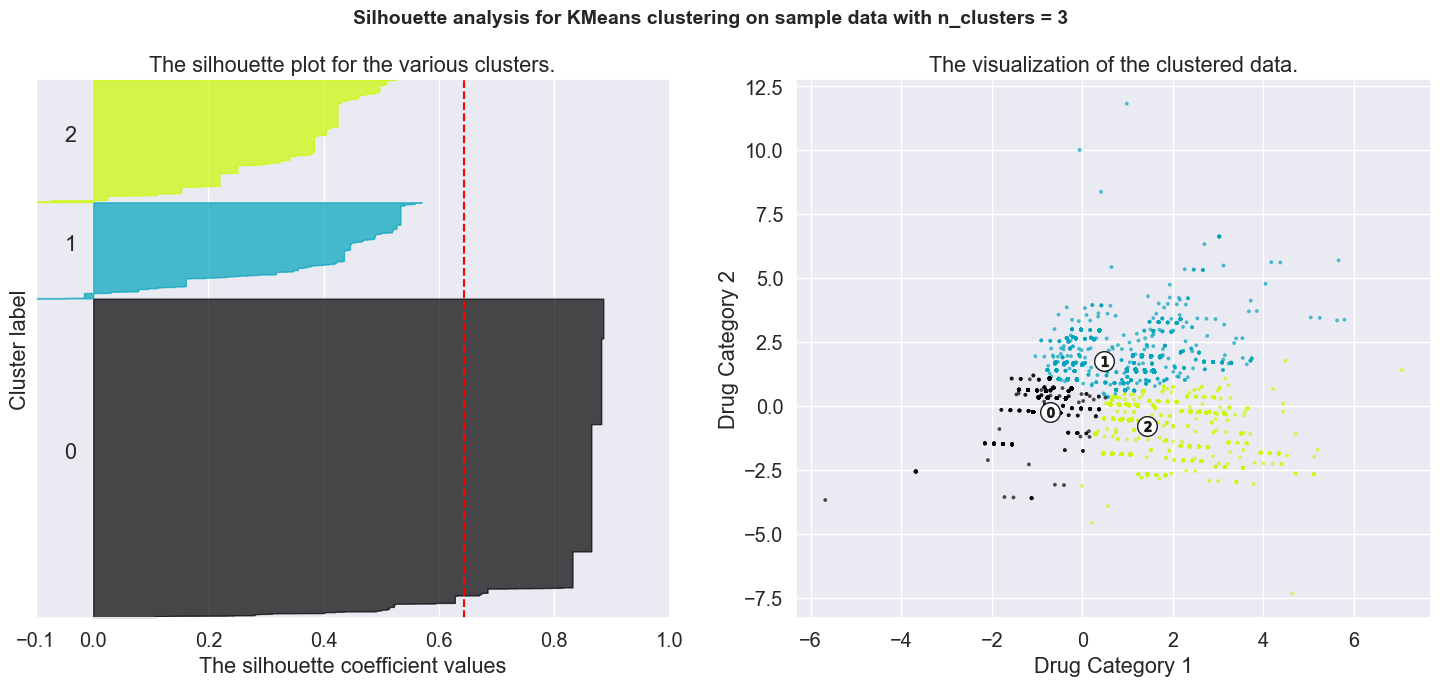

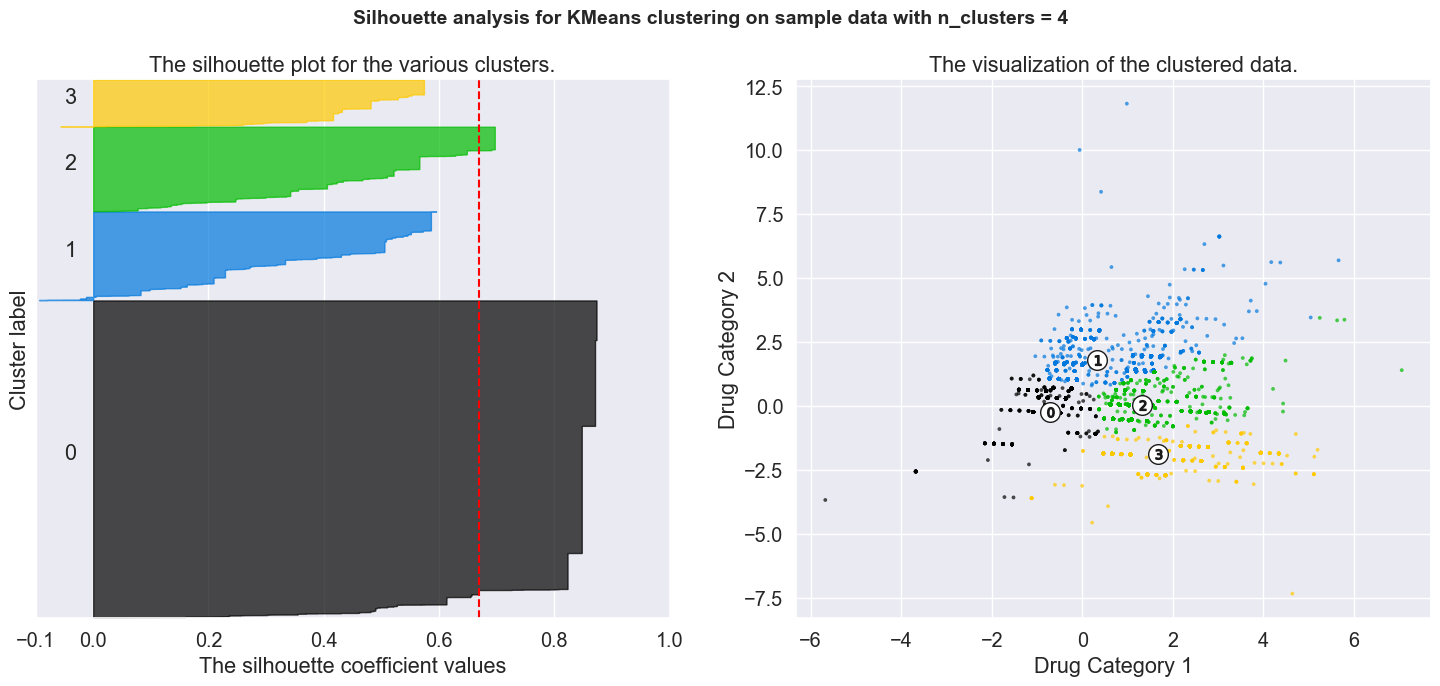

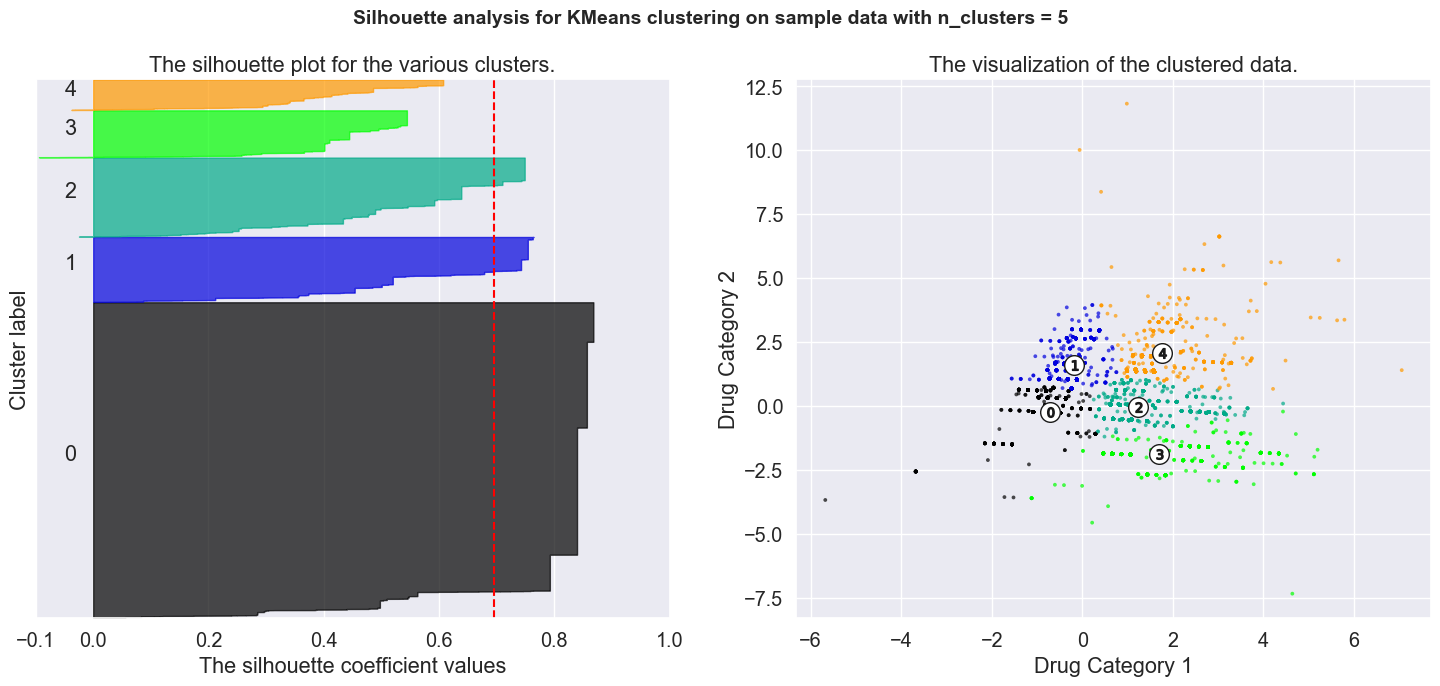

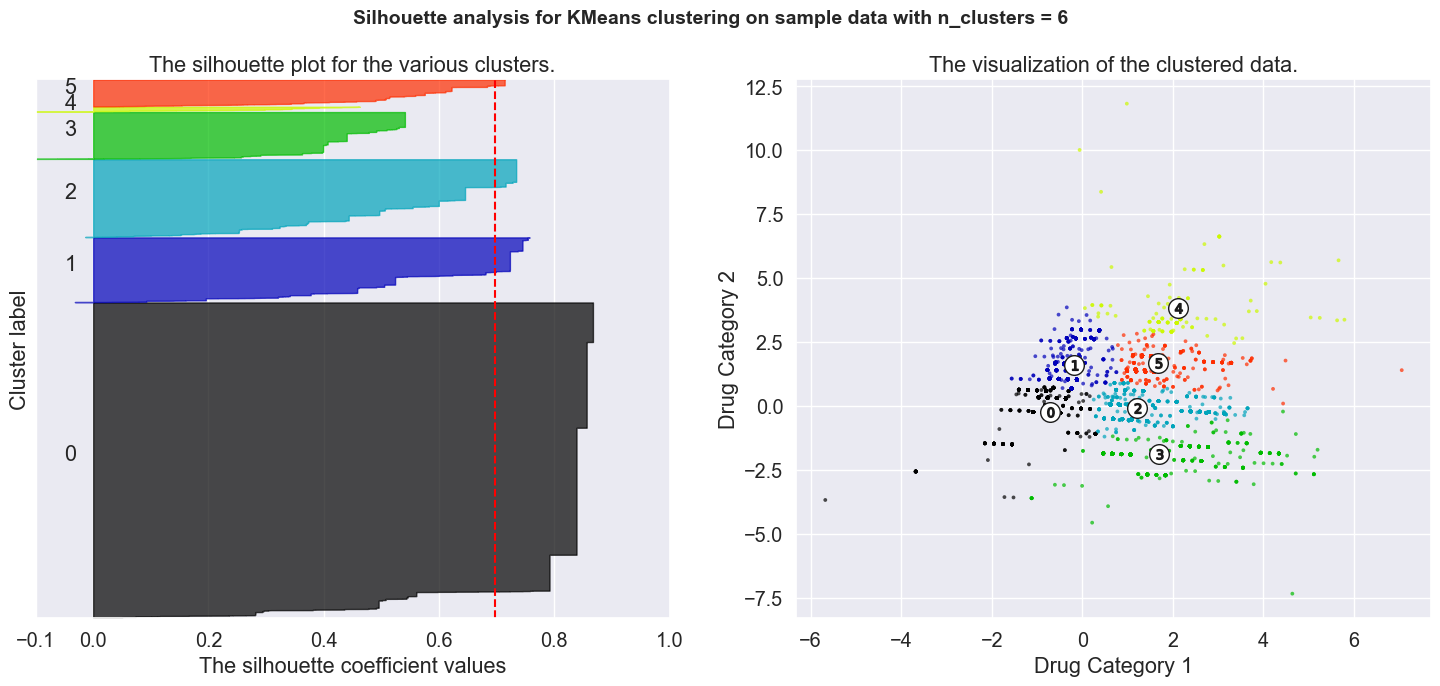

In [63]:
# Randomly select 15,000 samples due to the larger data set
random_indices = np.random.choice(len(silhouette_data), size=15000, replace=False)
X = silhouette_data[random_indices]


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Drug Category 1")
    ax2.set_ylabel("Drug Category 2")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

#### KMeans clustering on silhouette_data and displaying results

In [64]:
# Displaying the cluster ID result after determining the optimal k value（2）for K-means clustering

k_means = KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(X)  # Data X (15,000 randomly selected samples in the previous step)
labels = k_means.labels_

data_choice_df = pd.DataFrame(X, columns=['Drug Category 1', 'Drug Category 2'])  
data_choice_df['Cluster ID'] = labels

print(data_choice_df.head(20))

    Drug Category 1  Drug Category 2  Cluster ID
0          0.828097         0.038305           0
1         -0.482975        -0.283806           1
2          2.594401        -0.229482           0
3         -0.883340        -0.254922           1
4          1.064026        -1.904884           0
5         -0.482975        -0.283806           1
6         -0.482975        -0.283806           1
7         -0.482975        -0.283806           1
8         -0.683157        -0.269364           1
9         -0.482975        -0.283806           1
10        -0.119301         1.025185           1
11        -0.482975        -0.283806           1
12        -0.482975        -0.283806           1
13        -0.683157        -0.269364           1
14        -0.206913         2.325036           1
15        -0.883340        -0.254922           1
16        -0.482975        -0.283806           1
17        -0.482975        -0.283806           1
18        -0.883340        -0.254922           1
19        -0.588932 

### Report: K-means method



After observing the scatter plot (medicaPCA_result_data scatter plot), we noticed that the data exhibited a single cluster with an elongated elliptical distribution. Subsequently, through data preprocessing and dimensionality reduction, the SSE method was utilized to determine the optimal value of K for K-means clustering as 2.

When K is set to 2, there are cluster 0 and cluster 1. By comparing the data of these two clusters, It was found that individuals with low insulin usage were grouped into cluster 0, while those with high insulin usage were in cluster 1. The ratio of insulin usage between cluster 0 and cluster 1 is close to 1:11. It is tentatively speculated that the classification rules of the clusters are related to insulin usage.

Cluster ID insulin
Cluster 0 0.204946
Cluster 1 2.270668

However, during the silhouette coefficient analysis of the K-means clustering (Selhoutte Analysis Plot), It was observed that the average silhouette coefficient continued to increase as K increased after multiple runs, which may indicate a risk of overfitting with an increased number of clusters. Although the selected K value of 2 is considered the optimal number of clusters, the resulting average silhouette coefficient is only around 0.52, indicating a medium rate, and it is the lowest among other K values.

For n_clusters = 2
The average silhouette_score is : 0.5250715248632978

For n_clusters = 3
The average silhouette_score is : 0.5497215580266462

For n_clusters = 4
The average silhouette_score is : 0.5378325842808004

For n_clusters = 5
The average silhouette_score is : 0.5328484750640221

For n_clusters = 6
The average silhouette_score is : 0.5812506724093558

However, we know that the K-means clustering method is not suitable for handling non-circular shaped clusters, while our data exhibits a non-circular distribution. Therefore, the poor performance of the results is reasonable, as our data, being non-circular, is not suitable for analysis using the K-means clustering method. Thus, the reliability of inferring the correlation between insulin usage and the classification rules of K-means clusters is questionable.

Therefore, I need to find a clustering method suitable for handling this type of clusters. In this regard, we opted for the second method of DBSCAN because DBSCAN is a clustering algorithm adept at handling non-circular clusters.

## DBSCAN

#### Prepare data for DBSCAN clustering

In [65]:
from sklearn.cluster import DBSCAN

In [66]:
DBSC_data=medical_PCA_result_data.copy()

In [67]:
# Due to the significant computational resources required by the DBSCAN algorithm, 
# I opted to randomly select 15,000 samples for analysis

random_indices = np.random.choice(len(DBSC_data), size=15000, replace=False)
selected_data = DBSC_data[random_indices]

# Convert 'selected data' to a DataFrame
data_df = pd.DataFrame(selected_data, columns=['Drug Category 1', 'Drug Category 2'])

#### Perform DBSCAN clustering with different values
#### value 1: eps=3, min_samples=80

<AxesSubplot:xlabel='Drug Category 1', ylabel='Drug Category 2'>

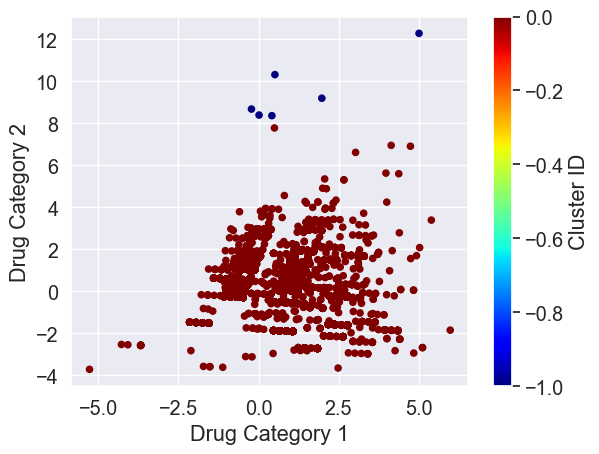

In [68]:
db = DBSCAN(eps=3, min_samples=80).fit(selected_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_, columns=['Cluster ID'])

# Concatenate data_df and labels
result = pd.concat([data_df, labels], axis=1)

# Plot the scatter plot
result.plot.scatter('Drug Category 1', 'Drug Category 2', c='Cluster ID', colormap='jet')

#### value 2: eps=1, min_samples=80

<AxesSubplot:xlabel='Drug Category 1', ylabel='Drug Category 2'>

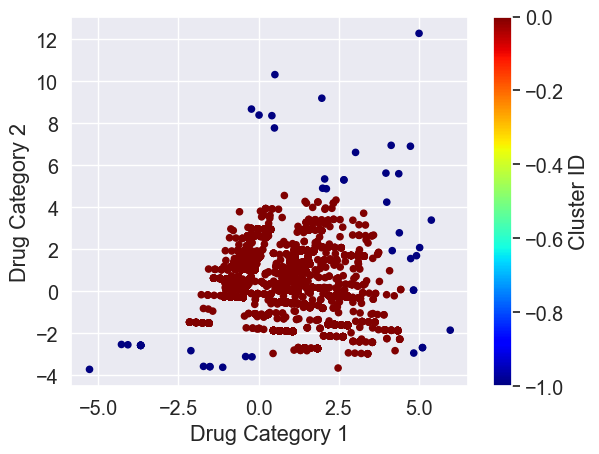

In [69]:
db = DBSCAN(eps=1, min_samples=80).fit(selected_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_, columns=['Cluster ID'])

# Concatenate data_df and labels
result = pd.concat([data_df, labels], axis=1)

# Plot the scatter plot
result.plot.scatter('Drug Category 1', 'Drug Category 2', c='Cluster ID', colormap='jet')

#### value 3: eps=0.5, min_samples=60

<AxesSubplot:xlabel='Drug Category 1', ylabel='Drug Category 2'>

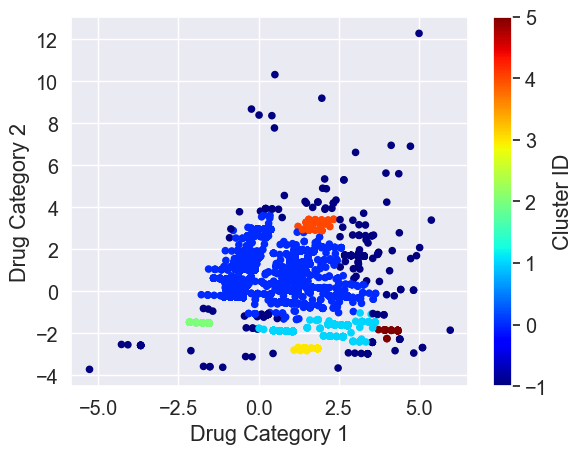

In [70]:
db = DBSCAN(eps=0.5, min_samples=60).fit(selected_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_, columns=['Cluster ID'])

# Concatenate data_df and labels
result = pd.concat([data_df, labels], axis=1)

# Plot the scatter plot
result.plot.scatter('Drug Category 1', 'Drug Category 2', c='Cluster ID', colormap='jet')

### Report: DBSCAN Method

Due to the significant computational resources required by the DBSCAN algorithm, we opted to randomly select 15,000 samples for analysis.

In the DBSCAN plot, we can visually observe that our clusters are elongated ellipses. If the DBSCAN analysis results highly overlap with the visually observed clusters, it indicates that our data is well-suited for this algorithm; otherwise, it is not. After trying various parameters, I selected the following three pairs for analysis:

- Value 1: eps=3, min_samples=80
- Value 2: eps=1, min_samples=80
- Value 3: eps=0.5, min_samples=60

Upon adjusting the parameters, we found that when using Value 1, an ideal cluster was formed,and the outlier points were excluded from the cluster. Values lower than this threshold resulted in multiple clusters, which broke down the ideal cluster—a result we did not desire. Therefore, at this stage, we compared the results with those of K-means. Without knowing the K value, we adjusted the density parameters and obtained ideal cluster formations. The conclusion at this stage is that DBSCAN is more suitable for clustering our data compared to the K-means algorithm.

However, we still wanted to explore a third clustering method to see if it could outperform DBSCAN. Hence, Hierarchical Clustering was utilize.

## Hierarchical clustering

#### Prepare data for hierarchical clustering

In [71]:
from sklearn.cluster import AgglomerativeClustering

In [72]:
hiera_data=medical_PCA_result_data.copy()

In [73]:
# Due to the higher computational cost of hierarchical clustering, I limited the dataset to 10000 points

random_indices = np.random.choice(len(hiera_data), size=10000, replace=False)
selected_data = hiera_data[random_indices]


# Convert 'data' to a DataFrame
data_df = pd.DataFrame(selected_data, columns=['Drug Category 1', 'Drug Category 2'])

#### Displaying the scatter plot of the selected data before analysis.

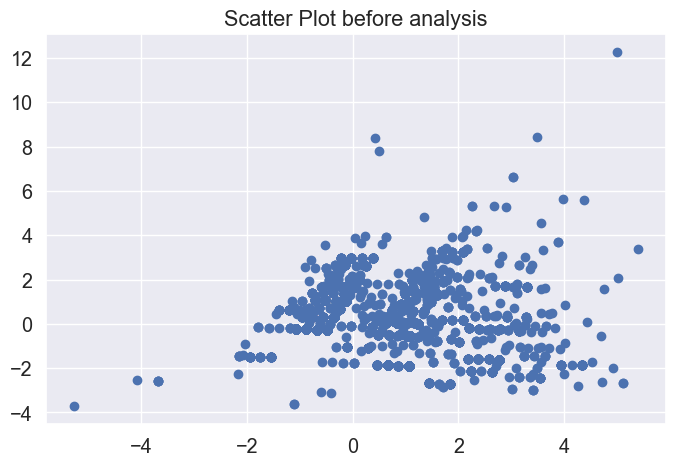

In [87]:
plt.figure(figsize=(8, 5))
plt.subplots_adjust(bottom=0.1)
plt.scatter(data_df.iloc[:,0],data_df.iloc[:,1])
plt.title('Scatter Plot before analysis')

plt.show()

#### Setting cluster value to 2 for Hierarchical Clustering analysis, and testing 3 different linkage methods to find the best fit for our dataset

 #### Linkage= Single Link

In [75]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='single')
cluster_labels = cluster.fit_predict(data_df)
print(cluster_labels)

[0 0 0 ... 0 0 0]


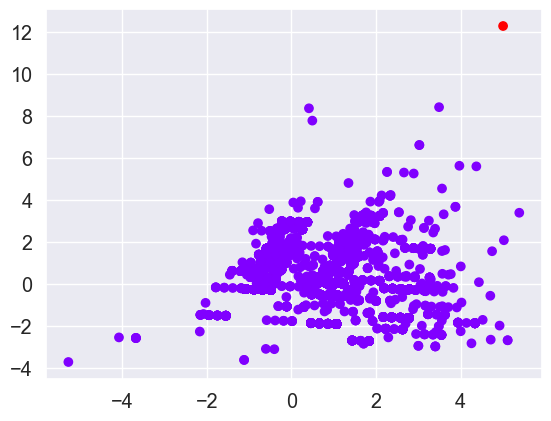

In [76]:
plt.scatter(data_df.iloc[:,0],data_df.iloc[:,1], c=cluster.labels_, cmap='rainbow')

#### Linkage = Complete Link

In [77]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='complete')
cluster_labels = cluster.fit_predict(data_df)

print(cluster_labels)

[0 0 0 ... 0 0 0]


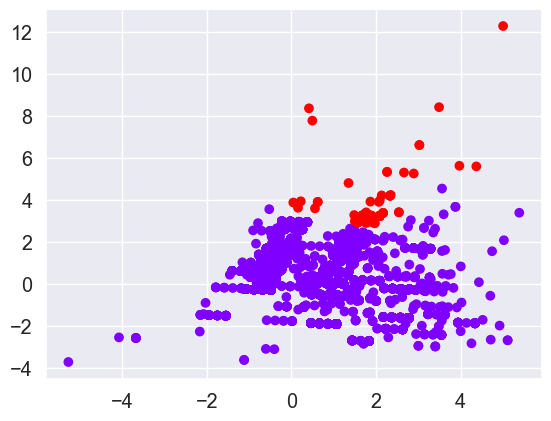

In [78]:
plt.scatter(data_df.iloc[:,0],data_df.iloc[:,1], c=cluster.labels_, cmap='rainbow')

#### Linkage = Average

In [79]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='average')
cluster_labels = cluster.fit_predict(data_df)
print(cluster_labels)

[0 0 0 ... 0 0 0]


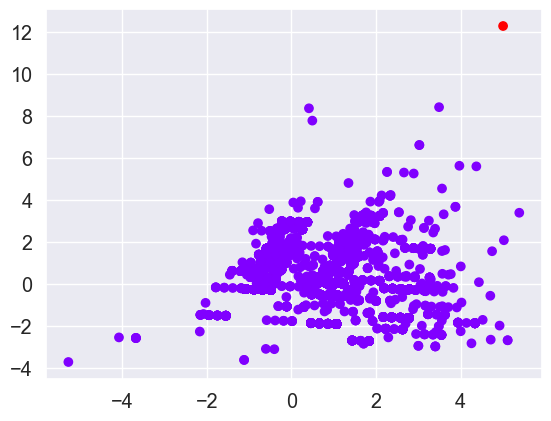

In [80]:
plt.scatter(data_df.iloc[:,0],data_df.iloc[:,1], c=cluster.labels_, cmap='rainbow')

### Findings and Results: Hierarchical Clustering

Due to the higher computational cost associated with hierarchical clustering, the dataset was limited to 10,000 points. Additionally, based on the previous SSE analysis, we determined that the optimal value of K for clustering is 2. Therefore, K=2 selected for clustering. In the scatter plot before analysis, we observed an elongated cluster with a few outlier points in the original scatter plot.

After conducting analyses using Single Link, Complete Link and Average Link, we noticed minimal variation in results across different linkage methods (single, complete, and average) due to the high density of the random data we generated (the dataset of every run is different).

However, in scenarios with a higher density of outliers, the results obtained using the average linkage method were more stable and less affected by outliers compared to the single linkage method, which exhibited the greatest sensitivity to outliers. Since my data is primarily discrete, I prefer to use the average linkage method for hierarchical clustering.

Given the substantial size of our dataset (over 90,000 rows), employing hierarchical clustering would be particularly slow and inefficient. Therefore, I believe it is not the optimal choice. Considering both computational cost and efficiency, I conclude that hierarchical clustering is not superior to the DBSCAN algorithm for our dataset.

# Task 7 Final Results

Here are the overall results and findings for each data mining aproach:
###### Association Rule Mining
After analysing ARM and FP results, it seems that there are strong associations of itemsets between "Caucasian", "Not measured", and "No" with the support parameters set at 70% and 60% respectively. Based on the results, in theory most individuals that are of "Caucasian" ethnicity has not been measured with blood sugar levels thus no changes in dosage or no changes in dosage tends to happen among "Caucasian". 

Despite the strong associations between this items, both methods determined that these itemsets are not likely to occur together more than their default state. Even if the lift in FP growth method shows a slight increase of probability, it is miniscule. Thus, the results disproves the theory mentioned previously.
###### Classification
After evaluating all classification algorithms, our analysis indicates that Naive Bayes stands out as the most suitable choice for our classifier. It achieves a balanced performance in terms of precision and recall for both 'Normal' and 'Risk' outputs, outperforming other models in this aspect. This balance is crucial in accurately categorizing abnormal HbA1C levels, allowing us to identify individuals with 'Normal' blood sugar levels without introducing bias.

Considering the medical context, minimizing false negatives (FN) remains a critical consideration, but in this case it may not be as urgent as in cases such as cancer detection. While it's essential to avoid FN, it's important to recognize that these HbA1C values reflect the past three months of blood sugar control, which may not immediately lead to severe complications. Early detection holds significance for initiating preventive measures, and so having a model that accurately identifies both instances the best will provide an overall better classification instance that still aligns with our goals of correctly identifying 'Risk' cases.
###### Clustering
Based on the findings and results that out of all the clustering methods, DBSCAN is the most suitable choice for our data, not only for its suitability in analyzing our non-circular shaped clusters but also for its superior performance in terms of computational cost and speed compared to hierarchical clustering.

###### Conclusion
In order to find the answers to the questions listed in the business scenario, the team conducted three data mining aproaches with each approach employs various algorithms to find, extract, and describe unseen information from the provided dataset. After multiple explorations, ARM determined no strong associations patterns between prescribed diabetes medications, number of medical procedures, race, gender, and age. However, it was determined that both Naive Bayes and DBSCAN algorithms were the best suitable  methods to use for this dataset when using classifying and clustering respectively. Therefore, while ARM could not find any association patterns, classification and clustering algorithms did produce interesting results and insights.

### Reference

[1] Clore,John, Cios,Krzysztof, DeShazo,Jon, and Strack,Beata. (2014). Diabetes 130-US Hospitals for Years 1999-2008. UCI Machine Learning Repository. https://doi.org/10.24432/C5230J.

[2] Diabetes UK, “What is HbA1c?,” Diabetes UK, 2021. https://www.diabetes.org.uk/guide-to-diabetes/managing-your-diabetes/hba1c